# <font color = 'orange'> K Means Clustering

## Unsupervised Machine Learning

---

### <font color = 'Blue'> Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

---

### <font color = 'Blue'> 1. Create Dataset

In [2]:
from sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 23)

In [4]:
x

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [5]:
# not required

y

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

### <font color = '#AA00FF'> Observation :
* There are 2 independent feature which is needed for us.
* **1 output feature which we are not using as it is unsupervised learning**.
* There 3 Categories in output denotes 3 Clusters.

---

### <font color = 'Blue'> Scatter plot

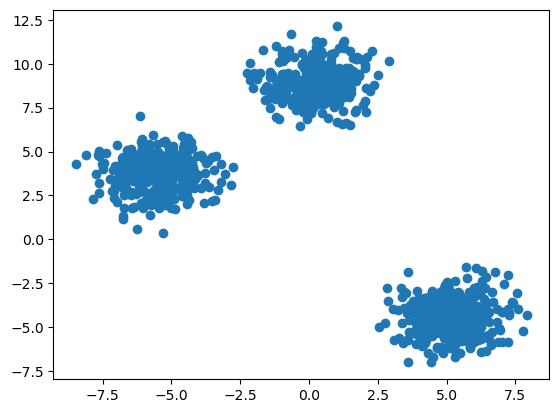

In [6]:
# plt.scatter(x[:,0],x[:,1], c = y) -> we have set color parameter to y axis

plt.scatter(x[:,0],x[:,1])

---

### <font color = 'Blue'> 2. Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

---

### <font color = 'Blue'> 3. To Find The Value of K i.e Number Of Clusters - Manually

In [9]:
from sklearn.cluster import KMeans

#### Finding the k value using elbow curve

In [10]:
# Elbow method - to find the K value
# we need wcss - within cluster sum of squares

wcss = []
for k in range(1,11):
    # K Means will have k number of centroids 
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    # initalize the centroids for our data
    kmeans.fit(x_train)
    # inertia will have wscc value 
    wcss.append(kmeans.inertia_)

### <font color = '#AA00FF'> Observation :
* It will intialize the centroid based on that it will calculate the wcss for different k value.
* After calculating wcss values we can find out the k value i.e number of clusters using Elbow method.

In [11]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.467788465513,
 991.9047984051341,
 853.5186163615213,
 754.5344380919564,
 665.6951564282551,
 579.5826748295093,
 533.4294137659074]

### <font color = '#AA00FF'> Observation :
* Wcss value will keep on reducing but we have to find the exact K value.

#### Plot Elbow curve

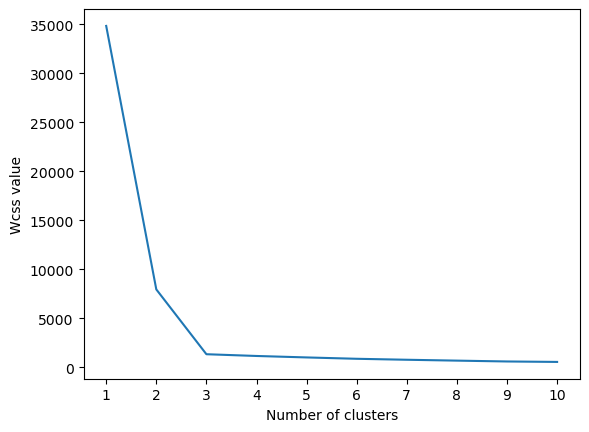

In [12]:
plt.plot(range(1,11), wcss)

# x-axis label
plt.xticks(range(1,11))

plt.xlabel('Number of clusters')
plt.ylabel('Wcss value')

plt.show()

### <font color = '#AA00FF'> Observation :
* We can notice that after number of clusters = 3 there is a stablization in elbow curve so our K value is 3.
    
* But for large data it is not easy to find k value so we have **knee locator** in sklearn.

---

### <font color = 'Blue'> 4. Train the model with 3 centroid 

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')

In [14]:
kmeans.fit(x_train)

KMeans(n_clusters=3)

### <font color = '#AA00FF'> Observation :
* For Training data we get the cluster in which they fall.

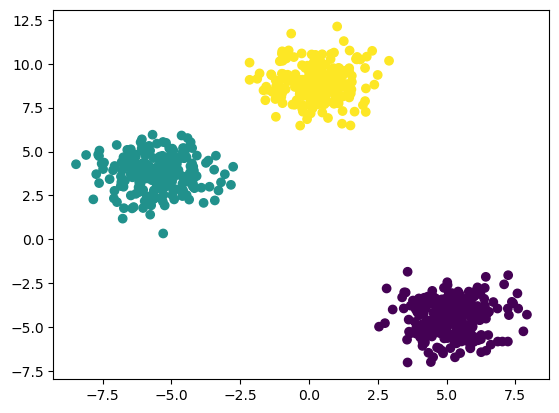

In [15]:
# scatter plot color parameter x_train data

plt.scatter(x_train[:,0], x_train[:,1], c = kmeans.labels_)

### <font color = '#AA00FF'> Observation :
* We can find 3 clusters.

---

### <font color = 'Blue'> Knee locator - to automate the finding of k value in elbow method

In [16]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [17]:
from kneed import KneeLocator

In [18]:
knee = KneeLocator(range(1,11), wcss, curve = 'convex', direction = 'decreasing')

knee.elbow

3

### <font color = '#AA00FF'> Observation :
* We got the k value directly from the kneelocator

---

### <font color = 'Blue'> 5. Performance Metrics - Silhouette score

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
silhouette_coefficients = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    silhouette_coefficients.append(score)
    
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.48196009682399193,
 0.33691828928108875,
 0.3466634066539347,
 0.3391390147411354,
 0.34249706374616906,
 0.34168001322005587]

In [21]:
kmeans.labels_

array([7, 9, 1, 2, 6, 2, 1, 2, 3, 1, 4, 8, 7, 3, 8, 3, 0, 6, 0, 0, 6, 8,
       8, 5, 6, 7, 1, 2, 6, 1, 5, 5, 3, 6, 4, 4, 4, 2, 2, 3, 7, 2, 3, 1,
       5, 0, 0, 7, 5, 1, 7, 8, 7, 9, 1, 1, 3, 4, 5, 5, 7, 3, 2, 1, 4, 8,
       0, 4, 5, 9, 8, 2, 1, 8, 1, 0, 6, 2, 6, 2, 7, 1, 4, 1, 4, 8, 9, 8,
       7, 8, 9, 0, 1, 2, 3, 1, 2, 4, 0, 0, 4, 2, 4, 9, 6, 2, 8, 1, 4, 3,
       2, 4, 1, 5, 2, 2, 5, 4, 9, 8, 9, 9, 8, 2, 1, 5, 9, 8, 2, 6, 1, 5,
       6, 2, 2, 6, 2, 6, 9, 7, 8, 0, 3, 6, 8, 4, 5, 7, 8, 8, 8, 2, 8, 1,
       1, 2, 9, 4, 4, 1, 0, 5, 0, 0, 2, 2, 2, 7, 2, 5, 7, 4, 2, 6, 0, 2,
       4, 7, 8, 6, 4, 6, 7, 5, 6, 5, 4, 7, 8, 5, 1, 0, 2, 3, 7, 0, 4, 1,
       4, 8, 4, 8, 1, 2, 7, 9, 4, 2, 8, 8, 1, 5, 7, 2, 7, 6, 4, 3, 6, 0,
       2, 9, 7, 6, 5, 4, 2, 7, 4, 0, 9, 0, 5, 9, 4, 6, 7, 1, 9, 7, 0, 1,
       1, 6, 3, 8, 0, 2, 1, 5, 3, 7, 5, 2, 6, 1, 8, 8, 5, 6, 5, 0, 0, 7,
       3, 1, 8, 0, 9, 8, 5, 0, 0, 8, 0, 2, 7, 6, 0, 2, 3, 5, 6, 4, 5, 4,
       8, 2, 6, 7, 1, 3, 6, 4, 2, 8, 7, 7, 3, 1, 2,

### <font color = '#AA00FF'> Observation :
* More the value towards 1 the better clustering has happened.
* So we can observe that for k = 3 better clustering happens we can also in below plot.

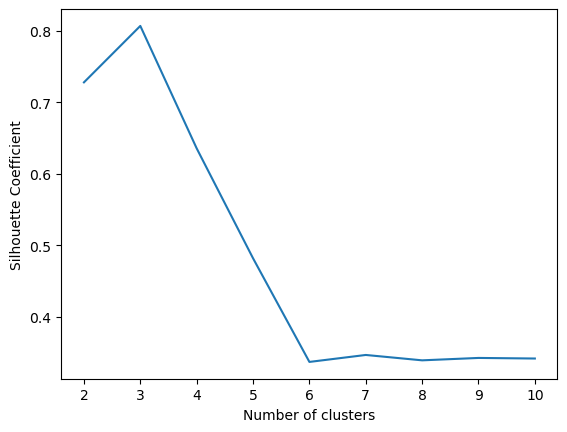

In [22]:
# plot 

plt.plot(range(2,11),silhouette_coefficients)

plt.xticks(range(2,11))

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

plt.show()

---